Finite difference methods can also be applied to PDEs, with some modification. In this case, the finite difference method will reduce a PDE into a system of ODEs that can be solved using an ODE solver, rather than reducing an ODE to an algebraic system of equations.

Let's take, for example, the following first-order PDE:

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0 $$

with the IC and BC:

$$u(x, 0) = f(x), u(0, t) = u(1, t) $$

This is a special form of boundary condition known as a periodic boundary condition.

We are going to reduce this PDE to an ODE using a finite difference approach in the x dimension:

$$\frac{d u_i}{dt} + c \bigg[ \frac{u_{i+1} - u_{i-1}}{2 \Delta x} \bigg] = 0 $$

This is valid for all points except at $i=0$. For that, we can plug in our periodic boundary condition:

$$ \frac{d u_0}{dt} + c \bigg[ \frac{u_{1} - u_{N}}{2 \Delta x} \bigg] = 0 $$

This gives us a system of equations that looks like:

$$\frac{d \textbf{u_i}}{dt} = -\frac{c}{2 \Delta x} 
\begin{bmatrix} 
0 & 1 & 0 & 0 & 0 & ... & 0 & -1 \\
-1 & 0 & 1 & 0 & 0 & ... & 0 & 0 \\
0 & -1 & 0 & 1 & 0 & ... & 0 & 0 \\
... & ... & ... & ... & ... & ... & ... & ... \\
1 & 0 & 0 & 0 & 0 & ... & -1 & 0 \\
\end{bmatrix} \textbf{u_i}$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [2]:
N = 301
A = np.diag(np.ones(N-1), 1) + np.diag(-np.ones(N-1), -1)

In [3]:
A[-1, :]

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0., -1.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0., -1.,  0.]])

In [3]:
dx = 1/(N-1)
c = 1
A = A/(2*dx)

In [4]:
ui, vi = np.linalg.eig(A)

Text(0, 0.5, 'Imaginary')

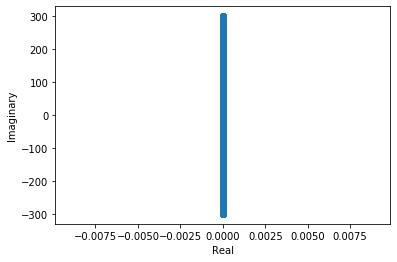

In [5]:
fig, ax = plt.subplots()

ax.scatter(np.real(ui), np.imag(ui))
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')

In [5]:
def dudt(u, t):
    N = u.shape[0]
    A = np.roll(np.eye(N), 1, axis=1) - np.roll(np.eye(N), -1, axis=1)
    c = 1
    dx = 1/N
    A = (0.5*c/dx)*A
    
    ddt = -np.matmul(A, u)
    return ddt

In [6]:
from scipy.integrate import odeint

Text(0, 0.5, 'u')

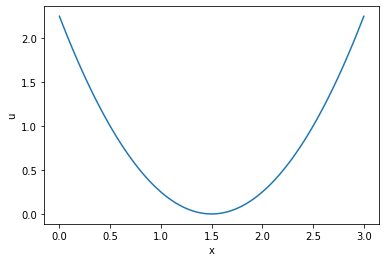

In [8]:
# Setting my initial conditions
x = np.linspace(0, 3, 100)
u0 = (x-1.5)**2

plt.plot(x, u0)
plt.xlabel('x')
plt.ylabel('u')

In [25]:
t = np.linspace(0, 3, 21)
x = np.linspace(0, 3, 101)
#u0 = np.cos(2*np.pi*t)
u0 = (x - 1.5)**2
print('dt: {}'.format(t[1]))
print('dx: {}'.format(x[1]))
print('CFL: {}'.format(1*t[1]/x[1]))

dt: 0.15
dx: 0.03
CFL: 5.0


In [26]:
xv, tv = np.meshgrid(x, t)
u = odeint(dudt, u0, t)

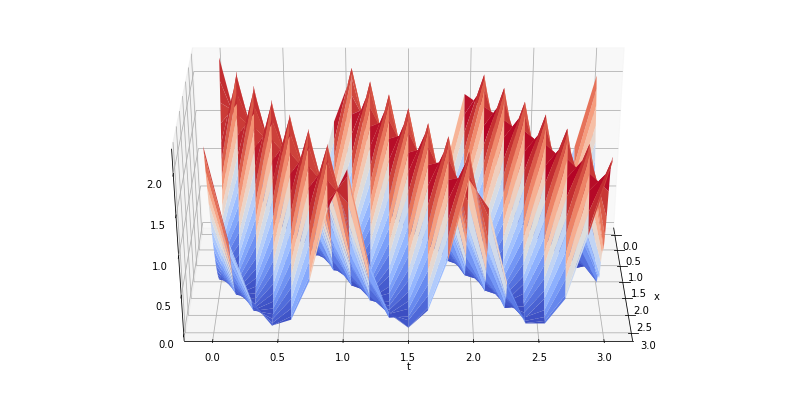

In [27]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, tv, u, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.view_init(elev=30, azim=0)

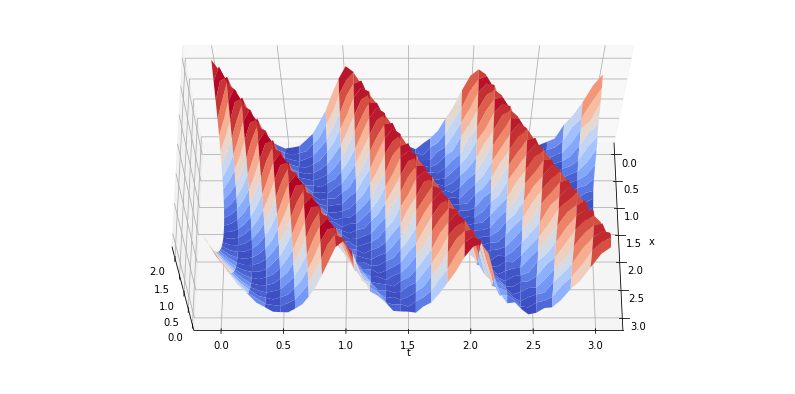

In [73]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, tv, u, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.view_init(elev=65, azim=0)

In [48]:
from matplotlib import animation, rc
from IPython.display import HTML

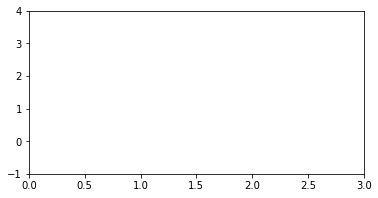

In [82]:
fig, ax = plt.subplots(figsize = (6, 3))
ax.set_xlim(( 0, 3))
ax.set_ylim((-1, 4))


line, = ax.plot([], [], lw=2)



def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    ui = u[i]
    line.set_data(t, ui)
    
    return (line,)

In [85]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=15, blit=True)

In [86]:
HTML(anim.to_html5_video())